<a href="https://colab.research.google.com/github/ravijainpro/colabs/blob/master/Copy_of_ram_day1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Synthetic data sets

# Data engineering

In [0]:
# Author: Kalidas Y <ykalidas at iittp dot ac dot in>
# License: BSD 3 clause

from sklearn.datasets import make_blobs, make_classification, make_gaussian_quantiles
from sklearn.datasets import make_circles, make_moons
from sklearn.datasets import make_multilabel_classification, make_biclusters, make_checkerboard, make_regression
from sklearn.datasets import make_friedman1, make_friedman2, make_friedman3
from sklearn.datasets import make_s_curve, make_swiss_roll

## Toy data sets

In [0]:
# Author: Kalidas Y <ykalidas at iittp dot ac dot in>
# License: BSD 3 clause

from sklearn.datasets import load_boston, load_iris, load_diabetes, load_digits, load_linnerud, load_wine, load_breast_cancer



## Real data sets

In [0]:
# Author: Kalidas Y <ykalidas at iittp dot ac dot in>
# License: BSD 3 clause

from sklearn.datasets import fetch_olivetti_faces, fetch_20newsgroups, fetch_20newsgroups_vectorized, fetch_lfw_people, fetch_covtype, fetch_rcv1, fetch_kddcup99, fetch_california_housing


## Missing value imputation

### set up

In [0]:
# Author: Kalidas Y <ykalidas at iittp dot ac dot in>
# License: BSD 3 clause

import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

### SimpleImputer

#### mean imputation 

In [0]:
# REF - https://scikit-learn.org/stable/modules/impute.html

imp = SimpleImputer(missing_values=np.nan, strategy='mean')

imp.fit([[1, 2], [np.nan, 3], [7, 6]])  

X = [[np.nan, 2], [6, np.nan], [7, 6]]

print (imp.transform(X))

[[4.         2.        ]
 [6.         3.66666667]
 [7.         6.        ]]


#### mode imputation (categorical attr) 

In [0]:
# REF - https://scikit-learn.org/stable/modules/impute.html

import pandas as pd
df = pd.DataFrame([["a", "x"],
                   [np.nan, "y"],
                   ["a", np.nan],
                   ["b", "y"]], dtype="category")

imp = SimpleImputer(strategy="most_frequent")
print(imp.fit_transform(df))      


[['a' 'x']
 ['a' 'y']
 ['a' 'y']
 ['b' 'y']]


### IterativeImputer

#### Multivariate feature imputation

In [0]:
# REF - https://scikit-learn.org/stable/modules/impute.html

import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp = IterativeImputer(max_iter=10, random_state=0)

imp.fit([[1, 2], [3, 6], [4, 8], [np.nan, 3], [7, np.nan]])  


X_test = [[np.nan, 2], [6, np.nan], [np.nan, 6]]
# the model learns that the second feature is double the first
print(np.round(imp.transform(X_test)))


[[ 1.  2.]
 [ 6. 12.]
 [ 3.  6.]]


# Simple optimization

## Line fitting

(10,) (10,)
init value =  [-1000 27863]
solution =  [3. 2.]


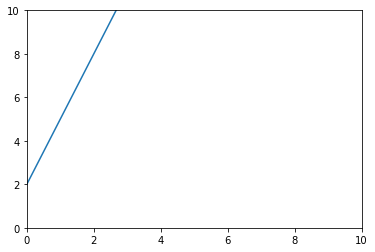

In [0]:
# Author: Kalidas Y <ykalidas at iittp dot ac dot in>
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

x = np.linspace(0,10,10)

y = 3 * x + 2 # we need to automatically figure out 3 and 2

print (x.shape, y.shape)

plt.xlim([0,10])
plt.ylim([0,10])

plt.plot(x,y)

f = lambda w : w[0]*x + w[1] #define f symbolically
mu = lambda z : np.sum(z)/z.shape[0] #to compute average

def fun_error(w) :
  tmp = np.sum((f(w) - y)**2)/x.shape[0]
  return tmp

def fun_grad(w) :
  tmp = np.zeros(2)
  
  a = 2*(f(w)-y)
  
  tmp[0] = mu(a*x)
  tmp[1] = mu(a*1)
  
  return tmp

a = -1000
b = 27863

w_init = np.asarray([a,b])

print ('init value = ', w_init)

res = minimize(fun=fun_error, x0=w_init, jac=fun_grad,method='BFGS')

print ('solution = ',res.x)



## Quadratic fitting

(100,) (100,)
init value =  [-1000 27863  -900]
solution =  [ 3.         -9.         11.99999999]


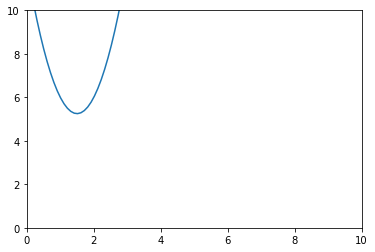

In [0]:
# Author: Kalidas Y <ykalidas at iittp dot ac dot in>
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

x = np.linspace(0,10,100)

y = 3 * x**2 - 9*x + 12 # we need to automatically figure out 3, -9, 12

print (x.shape, y.shape)

plt.xlim([0,10])
plt.ylim([0,10])

plt.plot(x,y)

# y = a.x^2 + b.x + c

f = lambda w : w[0]*(x**2) + w[1]*x + w[2]
mu = lambda z : np.sum(z)/z.shape[0]

def fun_error(w) :
  tmp = np.sum((f(w) - y)**2)/x.shape[0]
  return tmp

def fun_grad(w) :
  tmp = np.zeros(3)
  
  a = 2*(f(w) - y)
  
  tmp[0] = mu(a*(x**2))
  tmp[1] = mu(a*x)
  tmp[2] = mu(a)
  
  return tmp

a = -1000
b = 27863
c = -900

w_init = np.asarray([a,b,c])

print ('init value = ', w_init)

res = minimize(fun=fun_error, x0=w_init, jac=fun_grad,method='BFGS')

print ('solution = ',res.x)



## Exercises

1. Change line
1. Change quadratic
1. Change number of points
1. Fit for a polynomial of degree 6

# Linear Regression

## Generate data

In [0]:
# Author: Kalidas Y <ykalidas at iittp dot ac dot in>
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

### (x,y) coordinates

In [0]:
# Author: Kalidas Y <ykalidas at iittp dot ac dot in>
# License: BSD 3 clause

X1 = 2 * np.random.rand(100, 1)
y = 4 + 3 * X1 + np.random.randn(100, 1)

print (X1.shape, y.shape)

print (X1[0:10])

(100, 1) (100, 1)
[[1.16]
 [0.88]
 [1.45]
 [0.97]
 [1.75]
 [1.8 ]
 [0.84]
 [0.55]
 [1.18]
 [1.82]]


### (x,1,y) y-intercept

In [0]:
# Author: Kalidas Y <ykalidas at iittp dot ac dot in>
# License: BSD 3 clause

ones_col = np.ones((100,1))

X = np.concatenate((X1,ones_col),axis=1)

print (X.shape, y.shape, ones_col.shape)

print (X[0:10])

(100, 2) (100, 1) (100, 1)
[[1.16855467 1.        ]
 [0.63480388 1.        ]
 [1.56154309 1.        ]
 [1.92382498 1.        ]
 [0.3837862  1.        ]
 [0.57737991 1.        ]
 [0.47296835 1.        ]
 [1.66109998 1.        ]
 [1.1857846  1.        ]
 [1.45475244 1.        ]]


### Plot data

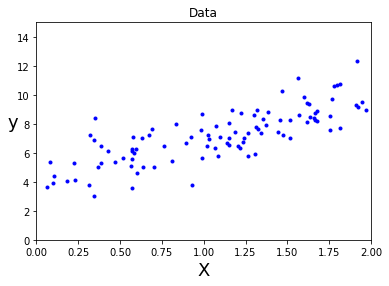

In [0]:
# Author: Kalidas Y <ykalidas at iittp dot ac dot in>
# License: BSD 3 clause

plt.title("Data")
plt.plot(X[:,0], y, "b.")
plt.xlabel("X", fontsize=18)
plt.ylabel("y", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

## Analytical solution

### Formulation

In [0]:
# Author: Kalidas Y <ykalidas at iittp dot ac dot in>
# License: BSD 3 clause

w_analytical = np.matmul( np.matmul( np.linalg.inv( np.matmul (X.T, X) ), X.T ), y)

print (w_analytical)

[[2.77734942]
 [4.20342371]]


### Test Analytical Solution

(2,) (2, 1)


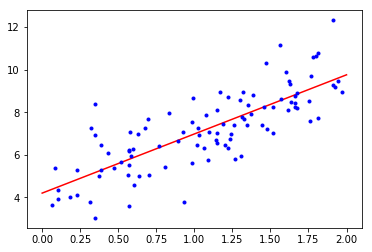

In [0]:
# Author: Kalidas Y <ykalidas at iittp dot ac dot in>
# License: BSD 3 clause

X_test = np.array([[0, 1], [2, 1]])

y_pred = np.matmul( X_test, w_analytical)

print (X_test[:,0].shape, y_pred.shape)

y1 = np.concatenate((y_pred))

#plot and see
plt.plot(X_test[:,0], y1, "r-")
plt.plot(X[:,0],y,'b.')


## Off the shelf library (sklearn)

In [0]:
# Author: Kalidas Y <ykalidas at iittp dot ac dot in>
# License: BSD 3 clause

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression(fit_intercept=False)

print (X.shape, y.shape)

lin_reg.fit(X, y)

print (lin_reg.coef_)

print (w_analytical)

w_sklearn = lin_reg.coef_.reshape(2,1)

(100, 2) (100, 1)
[[2.77734942 4.20342371]]
[[2.77734942]
 [4.20342371]]


## Gradient descent (manual)

### initial setting

In [0]:
# Author: Kalidas Y <ykalidas at iittp dot ac dot in>
# License: BSD 3 clause

eta = 0.1
n_iterations = 1000

### iterate to refine w

In [0]:
# Author: Kalidas Y <ykalidas at iittp dot ac dot in>
# License: BSD 3 clause

w_iter = np.random.randn(2,1)

for iteration in range(n_iterations):
    grad_w = 2*np.matmul( X.T
                         , np.matmul(X, w_iter) - y )/X.shape[0]
    w_iter = w_iter - eta * grad_w
    
print (w_iter)

print (w_analytical)

print (w_sklearn)

[[2.77734942]
 [4.20342371]]
[[2.77734942]
 [4.20342371]]
[[2.77734942]
 [4.20342371]]


## Using Optimization tools

### define loss function

In [0]:
# Author: Kalidas Y <ykalidas at iittp dot ac dot in>
# License: BSD 3 clause

def fun_error(w) :
  diff = np.matmul(w, X.T) - y.T
  err_val = np.matmul( diff, diff.T )/X.shape[0]
  return err_val[0][0]

### define gradient function

In [0]:
# Author: Kalidas Y <ykalidas at iittp dot ac dot in>
# License: BSD 3 clause

def fun_grad_error(w) :
  grad_val = 2*np.matmul( np.matmul(w, X.T) - y.T, X )/X.shape[0]
  return np.concatenate(grad_val)

### invoke optimization func

In [0]:
# Author: Kalidas Y <ykalidas at iittp dot ac dot in>
# License: BSD 3 clause

from scipy.optimize import minimize

w_init = np.random.randn(1,2)

err_val = fun_error(w_init)

grad_val = fun_grad_error(w_init)

print (err_val.shape, w_init.shape, grad_val.shape)

print (err_val, w_init, grad_val)

res = minimize(fun=fun_error, x0=w_init, jac=fun_grad_error,method='BFGS')

w_minimized = res.x

print (w_minimized)
print (w_analytical)
print (w_sklearn)
print (w_iter)

() (1, 2) (2,)
75.40075448706278 [[-1.01871603 -0.09276376]] [-20.10465411 -16.75535728]
[2.77734945 4.20342375]
[[2.77734942]
 [4.20342371]]
[[2.77734942]
 [4.20342371]]
[[2.77734942]
 [4.20342371]]


## Exercises

1. Increase number of data points
1. Increase dimensionality of the input and handle error scenarios
1. Change the data generation function
1. Change initial value settings
1. Change gradient function - learning rate


# Polynomial fitting

## Data generation

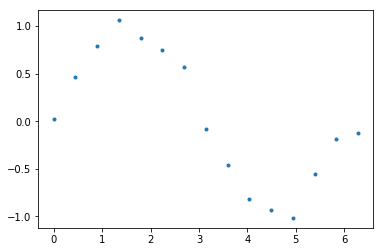

In [0]:
# Author: Kalidas Y <ykalidas at iittp dot ac dot in>
# License: BSD 3 clause

import numpy as np
from scipy.optimize import minimize

#Generate sinusodial data

n_points = 15

x_data = np.linspace(0,np.pi*2,n_points).reshape(-1,1)

def fun(x) :
    return np.sin(x)

y_true = fun(x_data)
y_noise = y_true +  + 0.1*np.random.randn(x_data.shape[0],1)

import matplotlib.pyplot as plt

plt.plot(x_data,y_noise,'.')

plt.show()


## Curve fitting (sklearn)

### Setting up

In [0]:
# Author: Kalidas Y <ykalidas at iittp dot ac dot in>
# License: BSD 3 clause

#Generate degree 10 data from the above single dimension

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.pipeline import make_pipeline

### Plot ground truth

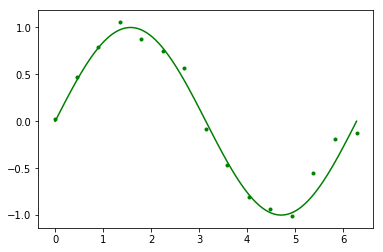

In [0]:
# Author: Kalidas Y <ykalidas at iittp dot ac dot in>
# License: BSD 3 clause

plt.plot( np.linspace(0,np.pi*2,100), fun(np.linspace(0,np.pi*2,100)), linestyle='-',color='green', label="true curve")

#actual data points
plt.scatter(x_data,y_noise,color='green',marker='.',label="ground truth")

### Polynomial degrees

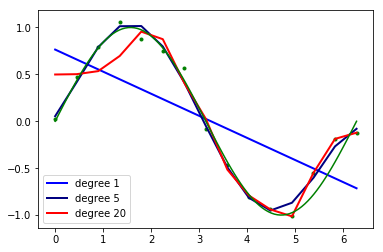

In [0]:
# Author: Kalidas Y <ykalidas at iittp dot ac dot in>
# License: BSD 3 clause

colors = ['blue', 'navy', 'red']
lw = 2

for count, degree in enumerate([1, 5, 20]):
    
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(x_data, y_noise)
    y_1 = model.predict(x_data)
    
    plt.plot(x_data, y_1, color=colors[count], linewidth=lw,
             label="degree %d" % degree)

plt.legend(loc='lower left')


#plot true curve
plt.plot( np.linspace(0,np.pi*2,100), fun(np.linspace(0,np.pi*2,100)), linestyle='-',color='green', label="true curve")

#actual data points
plt.scatter(x_data,y_noise,color='green',marker='.',label="ground truth")

plt.show()

### Exercises

1. Change number of points
1. Change degrees
1. Change function
1. Change noise

# Polynomial fitting & Regularization

## Plot Ridge regression

### Data generation

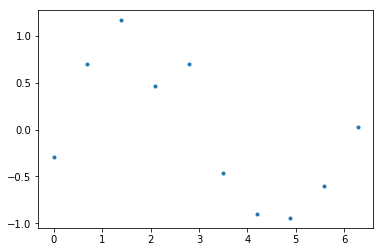

In [0]:
# Author: Kalidas Y <ykalidas at iittp dot ac dot in>
# License: BSD 3 clause

import numpy as np
from scipy.optimize import minimize

#Generate sinusodial data

n_points = 10

x_data = np.linspace(0,np.pi*2,n_points).reshape(-1,1)

def fun(x) :
    return np.sin(x) + 0.2*np.random.randn(x.shape[0],1)

y_data = fun(x_data)

import matplotlib.pyplot as plt

plt.plot(x_data,y_data,'.')

plt.show()

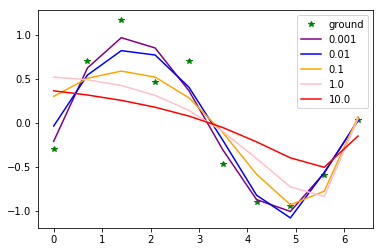

In [0]:
# Author: Kalidas Y <ykalidas at iittp dot ac dot in>
# License: BSD 3 clause

from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

degree1 = 15

pairs = [('purple',0.001), ('blue',0.01),('orange',0.1),('pink',1.0),('red',10.0)]

ax = plt.gca()

legends = []

a = plt.plot(x_data,y_data,'*',color='green')
legends.append((a[0],'ground'))


for color1,alpha1 in pairs:

  reg_poly = make_pipeline(PolynomialFeatures(degree=degree1), StandardScaler(),Ridge(alpha=alpha1)) 

  reg_poly.fit(x_data,y_data)

  ypred = reg_poly.predict(x_data)

  a = plt.plot(x_data,ypred,color=color1)
  legends.append((a[0],str(alpha1)))
  
ax.legend([h for h,l in legends],[l for h,l in legends])
  


### Exercises

1. Change number of points in the data set
1. Change $\alpha $ values
1. Change degree values

## Fit with L1 and L2 regularizations

In [0]:
# Author: Kalidas Y <ykalidas at iittp dot ac dot in>
# License: BSD 3 clause

#Fit curve using L1 and L2 regularization

x = PolynomialFeatures(degree=10).fit_transform(x_data)
y = y_data

from sklearn import linear_model
reg_l2 = linear_model.Ridge(alpha=1).fit(x, y)
reg_l1 = linear_model.Lasso(alpha=1).fit(x,y)
print (reg_l2.coef_, reg_l1.coef_)

[[ 0.00000000e+00  3.11528507e-01  1.88312383e-01  5.39613786e-02
  -4.72948487e-02 -4.75237598e-02  3.15083484e-02 -7.96905622e-03
   1.16533251e-03 -1.04022649e-04  4.32936940e-06]] [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -9.04320148e-03  5.05989182e-04  1.40417061e-04  9.80534269e-06
  2.32756016e-07 -1.00880831e-07 -2.94582482e-08]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=3.08545e-17): result may not be accurate.
  overwrite_a=False)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.8880111262775615, tolerance: 0.0004917926469026897
  positive)


### Prediction

In [0]:
# Author: Kalidas Y <ykalidas at iittp dot ac dot in>
# License: BSD 3 clause

y_pred_l2 = np.matmul(x,reg_l2.coef_.T)
y_pred_l1 = np.matmul(x,reg_l1.coef_.T)

### Plot L1 and L2 curves

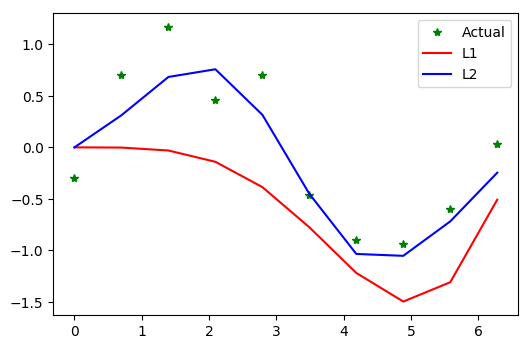

In [0]:
# Author: Kalidas Y <ykalidas at iittp dot ac dot in>
# License: BSD 3 clause

plt.figure(dpi=100)
act_plt = plt.plot(x_data,y,'*',color='green')
l1_plt = plt.plot(x_data,y_pred_l1,color='red')
l2_plt = plt.plot(x_data,y_pred_l2,color='blue')

ax = plt.gca()

ax.legend([act_plt[0], l1_plt[0], l2_plt[0]],['Actual','L1','L2'])

plt.show()

#Refer to https://discourse.julialang.org/t/userwarning-legend-does-not-support-line2d-object/970/3



### Different $L_p$ normalizations

Automatically created module for IPython interactive environment


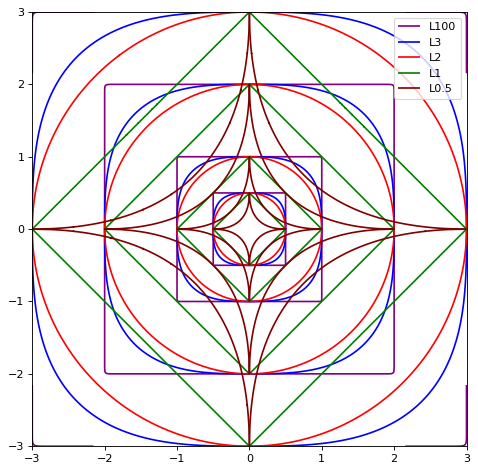

In [0]:
# Author: Kalidas Y <ykalidas at iittp dot ac dot in>
# License: BSD 3 clause

print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

lhalf_color = "maroon"
l1_color = "green"
l2_color = "red"
l3_color = "blue"
l100_color = "purple"
#elastic_net_color = "green"

line = np.linspace(-3.0, 3.0, 1001)
xx, yy = np.meshgrid(line, line)

l100 = np.power(np.abs(xx) ** 100 + np.abs(yy) ** 100, 1/100.0)
l3 = np.power(np.abs(xx) ** 3 + np.abs(yy) ** 3, 1/3.0)
l2 = np.sqrt(xx ** 2 + yy ** 2)
l1 = np.abs(xx) + np.abs(yy)
lhalf = np.power(np.sqrt(np.abs(xx)) + np.sqrt(np.abs(yy)), 2)

#rho = 0.5
#elastic_net = rho * l1 + (1 - rho) * l2

plt.figure(figsize=(6, 6), dpi=80)
ax = plt.gca()

#elastic_net_contour = plt.contour(xx, yy, elastic_net, levels=[1.5],
#colors=elastic_net_color)

l100_contour = plt.contour(xx, yy, l100, levels=[0, 0.5, 1, 2, 3], colors=l100_color)
l3_contour = plt.contour(xx, yy, l3, levels=[0, 0.5, 1, 2, 3], colors=l3_color)
l2_contour = plt.contour(xx, yy, l2, levels=[0, 0.5, 1, 2, 3], colors=l2_color)
l1_contour = plt.contour(xx, yy, l1, levels=[0, 0.5, 1, 2, 3], colors=l1_color)
lhalf_contour = plt.contour(xx, yy, lhalf, levels=[0, 0.5, 1, 2, 3], colors=lhalf_color)

ax.set_aspect("equal")

leg_list = []
leg_labs = ['L100','L3','L2','L1','L0.5']
for x in [ l100_contour, l3_contour, l2_contour, l1_contour, lhalf_contour ] :
  leg,_ = x.legend_elements()
  leg_list.append(leg[0])

ax.legend(leg_list, leg_labs)


#ax.spines['left'].set_position('center')
#ax.spines['right'].set_color('none')
#ax.spines['bottom'].set_position('center')
#ax.spines['top'].set_color('none')

#plt.clabel(elastic_net_contour, inline=1, fontsize=18, fmt={1.0: 'elastic-net'}, manual=[(-1, -1)])
#plt.clabel(l2_contour, inline=1, fontsize=18,
#           fmt={1.0: 'L2'}, manual=[(-1, -1)])
#plt.clabel(l1_contour, inline=1, fontsize=18,
#           fmt={1.0: 'L1'}, manual=[(-1, -1)])

plt.tight_layout()
plt.show()

### Exercises

1. Plot L_0.1 plot above
1. Plot L1 and L2 curves for degree=20
1. Plot L1 and L2 curves for different number of points in the data

# Logistic Regression

## Data generation

(100, 2) (100,)


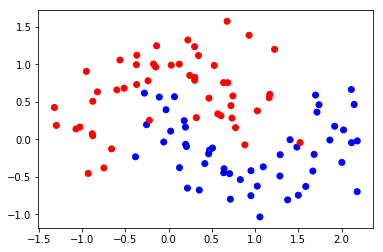

In [0]:
# Author: Kalidas Y <ykalidas at iittp dot ac dot in>
# License: BSD 3 clause

from sklearn.datasets import make_moons, make_circles, make_classification
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression
import numpy as np

#X, y = make_circles(noise=0.2, factor=0.5, random_state=1)
X, y = make_moons(noise=0.3, random_state=0)


plt.scatter(X[:,0],X[:,1],c=y,cmap=ListedColormap(['#FF0000', '#0000FF']))

print (X.shape, y.shape)

## Solving by optimization equation

### Primary -1, 1 form (2 class problem)

#### define sigmoid function

In [0]:
# Author: Kalidas Y <ykalidas at iittp dot ac dot in>
# License: BSD 3 clause

# -1 and 1 as labels
y_negpos = (2*y - 1).reshape(-1,1)

print (y_negpos.shape)

def fun1_sigmoid(w) :  
  w = w.reshape(-1,1)
  tmp = 1/( 1 + np.exp( np.multiply(-1 * y_negpos, np.matmul(X,w) ) ) )
  return tmp


(100, 1)


#### define error function

In [0]:
# Author: Kalidas Y <ykalidas at iittp dot ac dot in>
# License: BSD 3 clause

def fun1_error(w) :
  tmp = fun1_sigmoid(w)
  tmp = np.log(1/tmp)
  return np.sum(tmp)/X.shape[0]
  
  

#### define gradient function

In [0]:
# Author: Kalidas Y <ykalidas at iittp dot ac dot in>
# License: BSD 3 clause

def fun1_grad(w) :
  tmp = fun1_sigmoid(w)
  tmp2 = 1 - tmp
  tmp3 = np.multiply(-1*y_negpos, tmp2)
  tmp4 = np.matmul(X.T,tmp3)/X.shape[0]*0.01
  return tmp4.T[0]

### Alternative 0,1 form (2 class problem)

In [0]:
# Author: Kalidas Y <ykalidas at iittp dot ac dot in>
# License: BSD 3 clause

def fun2_sigmoid(z) :
  return 1/(1 + np.exp(-z))
  
def fun2_error(w) :
  w = w.T #minimizer artifacts, we need to rotate it
  
  m = X.shape[0]
  z = np.dot(X,w)            
  h = fun2_sigmoid(z)
           
  J=(float(-1)/m)*((y.T.dot(np.log(h))) + ((1 - y.T).dot(np.log(1 - h))))  
  
  return J
  
def fun2_grad(w) :
  w = w.T #for the minimzer
  
  m = X.shape[0]
  z = np.dot(X,w)            
  h = fun2_sigmoid(z);

  grad = (float(1)/m)*((h-y).T.dot(X))   
  
  grad = grad.T
  
  return grad 

### execute optimizer

In [0]:
# Author: Kalidas Y <ykalidas at iittp dot ac dot in>
# License: BSD 3 clause

from scipy.optimize import minimize

np.random.seed(42)

w_init = np.random.randn(1,2)[0]

minza_fun = fun1_error
minza_jac = fun1_grad

err_val = minza_fun(w_init)

grad_val = minza_jac(w_init)

print (err_val, w_init.shape, grad_val.shape)

print (w_init, grad_val)



res = minimize(fun=minza_fun, x0=w_init, jac=minza_jac,method='BFGS',
                       options={'maxiter':1000,'disp':True})

w_minimized = res.x

print (w_minimized)


0.5853390744919174 (2,) (2,)
[ 0.49671415 -0.1382643 ] [-0.00105896  0.00175492]
Optimization terminated successfully.
         Current function value: 0.337960
         Iterations: 17
         Function evaluations: 21
         Gradient evaluations: 21
[ 1.48638131 -3.54581371]


## Fitting by sklearn function

In [0]:
# Author: Kalidas Y <ykalidas at iittp dot ac dot in>
# License: BSD 3 clause

clf = LogisticRegression(solver='lbfgs', fit_intercept=False, penalty='none', random_state=42)

clf.fit(X,y)

print (clf.coef_)

[[ 1.48672566 -3.54573232]]


## Fitting using SGD Classifier and loss function

In [0]:
# Author: Kalidas Y <ykalidas at iittp dot ac dot in>
# License: BSD 3 clause

from sklearn.linear_model import SGDClassifier


clf = SGDClassifier(loss='log',fit_intercept=False, random_state=42, 
                    learning_rate='constant', eta0=1, penalty='none', alpha=0)

clf.fit(X,y)

print (clf.coef_)


#Change the y coordinate and fit the SGD classifier
y1 = 2*y -1 #-1,1 form
clf.fit(X,y1)

print (clf.coef_)


[[ 1.05898309 -3.83785573]]
[[ 1.05898309 -3.83785573]]


## Plotting - Logistic Regression

### Plotting - SGD

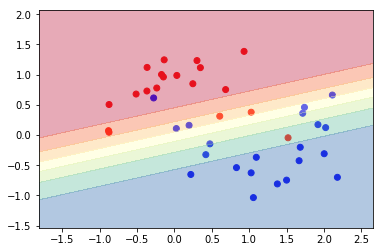

In [0]:
#REF - https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=42)

h = 0.02
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

Z = Z.reshape(xx.shape)

plt.scatter(X_test[:,0],X_test[:,1],c=y_test,cmap=ListedColormap(['#FF0000', '#0000FF']))
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=.4)

### Plotting - Manually optimized

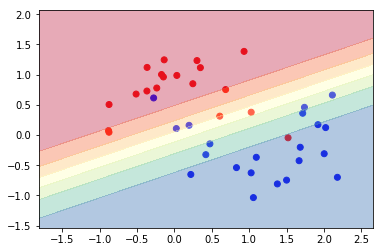

In [0]:

# Author: Kalidas Y <ykalidas at iittp dot ac dot in>
# License: BSD 3 clause

#REF - https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html
# hacky way
clf.coef_ = w_minimized.reshape(1,-1)

h = 0.02
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

Z = Z.reshape(xx.shape)

plt.scatter(X_test[:,0],X_test[:,1],c=y_test,cmap=ListedColormap(['#FF0000', '#0000FF']))
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=.4)

## Exercises

1. Execute the problem for 0,1 formulation
1. Change the data set for make_circles and execute the classifier
1. Introduce learning rate into the hand composed optimization forms
1. Change number of iterations
1. Write down by looking at the code, the formulae for error function and the gradients in primary and alternative forms
1. Plot the point predictions for Optimization using Primary form, Alternative form; Sklearn's function call and SGD classifier

# Metrics and Visualization

## Confusion Matrix - Printing

In [0]:
# Author: Kalidas Y <ykalidas at iittp dot ac dot in>
# License: BSD 3 clause

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as fun_prfs

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4)

clf = LogisticRegression(solver='lbfgs')

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

print (confusion_matrix(y_true=y_test,y_pred=y_pred).ravel())


print (fun_prfs(y_true=y_test,y_pred=y_pred))

[15  2  4 19]
(array([0.78947368, 0.9047619 ]), array([0.88235294, 0.82608696]), array([0.83333333, 0.86363636]), array([17, 23]))


## Confusion matrix - Visualization

Automatically created module for IPython interactive environment
Confusion matrix, without normalization
[[15  2]
 [ 4 19]]


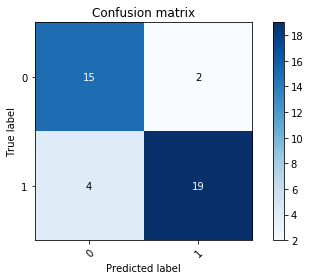

In [0]:
# REF - https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py

print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

class_names = ['0','1']

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = [classes[i] for i in unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

  
np.set_printoptions(precision=2)

y_pred = clf.predict(X_test)

#print (class_names, unique_labels(y_pred,y_test), class_names[])

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names, title='Confusion matrix')

plt.show()


## PR Curve

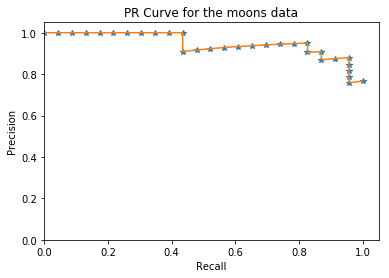

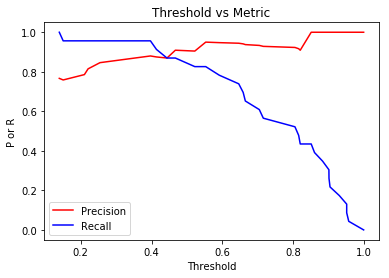

In [0]:
# Author: Kalidas Y <ykalidas at iittp dot ac dot in>
# License: BSD 3 clause

from sklearn.metrics import precision_recall_curve

y_score = clf.predict_proba(X_test)[:,1]

precision, recall, thresholds = precision_recall_curve(y_test, y_score)


plt.plot(recall,precision,'*')
plt.plot(recall,precision)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.05])
plt.title('PR Curve for the moons data')


plt.figure()

thr1 = np.append(thresholds,[1.0])

plt.plot(thr1,precision,color='red',label='Precision')
plt.plot(thr1,recall,color='blue',label='Recall')
plt.xlabel('Threshold')
plt.ylabel('P or R')
plt.title('Threshold vs Metric')
plt.legend(loc='best')
plt.show()

## ROC Curve

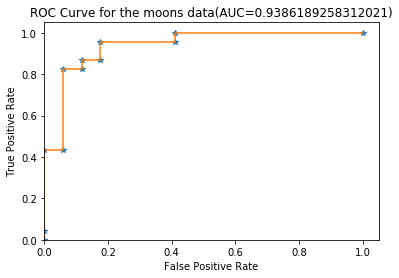

In [0]:
# Author: Kalidas Y <ykalidas at iittp dot ac dot in>
# License: BSD 3 clause

from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_true=y_test,y_score=y_score)

auc_score = auc(fpr,tpr)

plt.title('ROC Curve for the moons data' + '(AUC=' + str(auc_score) + ')')
plt.plot(fpr, tpr,'*')
plt.plot(fpr, tpr)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.xlim([0.0,1.05])
plt.ylim([0.0,1.05])
plt.show()

## Exercises

1. Write a function to generate all the plots in one go
1. Increase noise in the Moons data set and computer confusion matrix, PR and ROC curves
1. Generate the plots for Circles data set
1. Change the clf.coef_ to Manually computed optimal values and generate the plots

# Loss function effects

## Visualizing loss functions

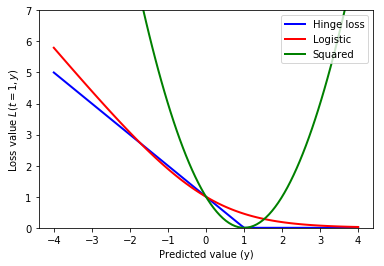

In [0]:
# Author: Kalidas Y <ykalidas at iittp dot ac dot in>
# License: BSD 3 clause
# REF - https://scikit-learn.org/stable/auto_examples/linear_model/plot_sgd_loss_functions.html

import numpy as np

xmin, xmax = -4, 4
y = np.linspace(xmin, xmax, 100) # predicted value
t = 1                            # true value
lw = 2
# plt.plot([xmin, 0, 0, xmax], [1, 1, 0, 0], color='gold', lw=lw, label="Zero-one loss")

#plt.plot(y, np.where(xx < 1, 1 - xx, 0), color='green', lw=lw, label="Hinge loss")
plt.plot(y, np.maximum(0,1 - t*y), color='b', lw=lw, label="Hinge loss")

# plt.plot(y, -np.minimum(xx, 0), color='yellowgreen', lw=lw, label="Perceptron loss")

plt.plot(y, np.log2(1 + np.exp(-t*y)), color='r', lw=lw, label="Logistic")

plt.plot(y, (t-y) ** 2, color='g', lw=lw, label="Squared")

plt.ylim((0, 7))
plt.legend(loc="upper right")
plt.xlabel("Predicted value (y)")
plt.ylabel("Loss value $L(t=1, y)$")
plt.show()


## Visualizing final solutions

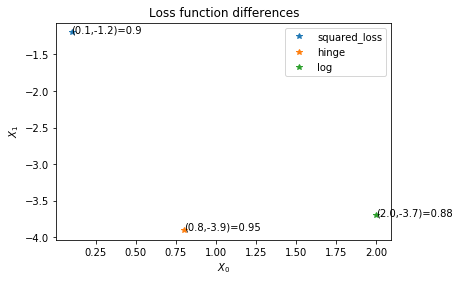

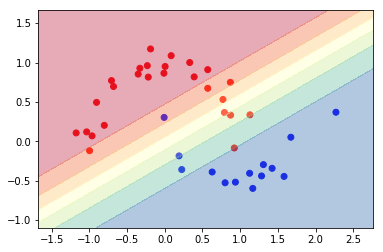

In [0]:
# Author: Kalidas Y <ykalidas at iittp dot ac dot in>
# License: BSD 3 clause

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.linear_model import SGDClassifier 
from sklearn.datasets import make_moons, make_circles, make_classification
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

##############################

def plot_me(clf) :

  h = 0.02
  x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
  y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

  Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
  
  Z = Z.reshape(xx.shape)

  plt.scatter(X_test[:,0],X_test[:,1],c=y_test,cmap=ListedColormap(['#FF0000', '#0000FF']))
  plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=.4)
  
##############################

X,y = make_moons(random_state=42,noise=0.1)
#X,y = make_circles(random_state=42)

#X,y = make_classification(random_state=42, n_features=2, n_redundant=0, n_informative=2,n_clusters_per_class=1)
#rng = np.random.RandomState(2)
#X += 2 * rng.uniform(size=X.shape)


plt.figure()

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=42)

loss_funs = ['squared_loss','hinge','log']
colours = ['maroon','blue','green']
handles = []

ax = plt.gca()

plt.xlabel('$X_0$')
plt.ylabel('$X_1$')
plt.title('Loss function differences')

for count in range(0,3) :
  
  clf = SGDClassifier(loss=loss_funs[count],fit_intercept=False, random_state=42, 
                    learning_rate='constant', eta0=1, penalty='none', alpha=0)

  clf.fit(X_train,y_train)
  
  y_pred = clf.predict(X_test)
  
  acc = accuracy_score(y_true=y_test,y_pred=y_pred)
  
  ix = round(clf.coef_[0][0],1)
  iy = round(clf.coef_[0][1],1)
  
  a = plt.plot(ix,iy,'*')
  
  text = '('+str(ix)+','+str(iy)+')' +'=' + str(round(acc,2))
  
  ax.annotate(text,xy=(ix,iy))
  
  handles.append(a[0])
  
  if loss_funs[count] == 'log' :
    plt.figure()
    plot_me(clf)
  
  
ax.legend(handles, loss_funs,loc='upper right')
  


## Exercises

1. Change random_state value and execute
1. Change data set and execute
1. Change the position of the legend as appropriate

# Logistic Regression on Image Data

## Fitting Logistic Regression

Automatically created module for IPython interactive environment


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Classification report for classifier LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False):
              precision    recall  f1-score   support

           0       0.94      0.97      0.96        88
           1       0.86      0.89      0.88        91
           2       0.98      0.98      0.98        86
           3       0.99      0.82      0.90        91
           4       0.99      0.93      0.96        92
           5       0.83      0.90      0.86        91
           6       0.94      0.99      0.96        91
           7       0.98      0.89      0.93        89
           8       0.89      0.88      0.88        88
           9       0.83      0.92      0.87        92

    accuracy                           0.

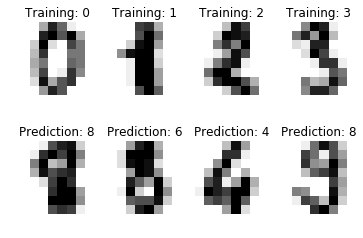

In [0]:
# REF - https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html

print(__doc__)

# Author: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
# License: BSD 3 clause

# Standard scientific Python imports
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics

# The digits dataset
digits = datasets.load_digits()

# The data that we are interested in is made of 8x8 images of digits, let's
# have a look at the first 4 images, stored in the `images` attribute of the
# dataset.  If we were working from image files, we could load them using
# matplotlib.pyplot.imread.  Note that each image must have the same size. For these
# images, we know which digit they represent: it is given in the 'target' of
# the dataset.
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
#classifier = svm.SVC(gamma=0.001)
classifier = LogisticRegression()

# We learn the digits on the first half of the digits
classifier.fit(data[:n_samples // 2], digits.target[:n_samples // 2])

# Now predict the value of the digit on the second half:
expected = digits.target[n_samples // 2:]
predicted = classifier.predict(data[n_samples // 2:])

print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

plt.show()



# PR Curves for Multi-class

## Reference material

1. REF - https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html

1. REF - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.average_precision_score.html#sklearn.metrics.average_precision_score

1. REF - https://scikit-learn.org/stable/modules/model_evaluation.html#precision-recall-f-measure-metrics

1. REF - https://datascience.stackexchange.com/questions/15989/micro-average-vs-macro-average-performance-in-a-multiclass-classification-settin


## set up

### Load data

In [0]:
# Load digits data

X = digits.data
y = digits.target

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4)

print (X_test.shape, y_test.shape)

(719, 64) (719,)


### Binarize (one **hot**)

In [0]:
from sklearn.preprocessing import label_binarize

my_classes = np.unique(y)

y1_test = label_binarize(y_test,classes=my_classes)

print (y.shape, y1_test.shape)

(1797,) (719, 10)


## Fit classifier

In [0]:
clf = LogisticRegression()

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
y_probas = clf.predict_proba(X_test)

print (y_pred.shape, y_probas.shape)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


(719,) (719, 10)


## Compute PR curves per class

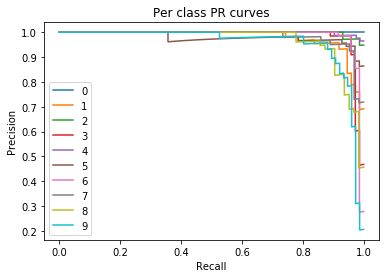

In [0]:
from sklearn.metrics import precision_recall_curve

plt.figure()

for mycls in my_classes :
  p,r,t = precision_recall_curve(y_true=y1_test[:,mycls],probas_pred=y_probas[:,mycls])
  plt.plot(r,p,label=str(mycls))
  
plt.legend(loc='best')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Per class PR curves')
plt.show()


## Compute average precision scores

In [0]:
from sklearn.metrics import average_precision_score

for avg_type in ['macro','micro','weighted'] :
  avg_prec = average_precision_score(y_true=y1_test,y_score=y_probas,average=avg_type)
  print (avg_type,avg_prec)
  

macro 0.9831400693526229
micro 0.9799266232194574
weighted 0.9834252540834794
